## Generate plots of disc energy and cooling time. Requires running of phantom to generate a 'u_and_udot.dat' file, as the cooling time is not readily available in pyphantom.

## notebook will run phantom, generate the file and plot azimuthally averaged values.

## Ensure code at the end of the force subroutine in force.F90 is enabled such that the 'u_and_udot.dat' file will be written.

In [1]:
import os
import sys
import shutil
import numpy as np
import subprocess
import tempfile
import matplotlib.pyplot as plt
import PIL.Image as Image

In [2]:
sys.path.insert(0,'../modules')
import phantom

In [3]:
units = phantom.get_units()

In [4]:
dumps = [
    '../a250/mdisc0.2/extra_dumps/sgdisc_00026',
    '../a500/mdisc0.2/extra_dumps/sgdisc_00065',
    '../single/mdisc0.2/extra_dumps/sgdisc_00020'
]

../a250/mdisc0.2/extra_dumps/sgdisc_00026


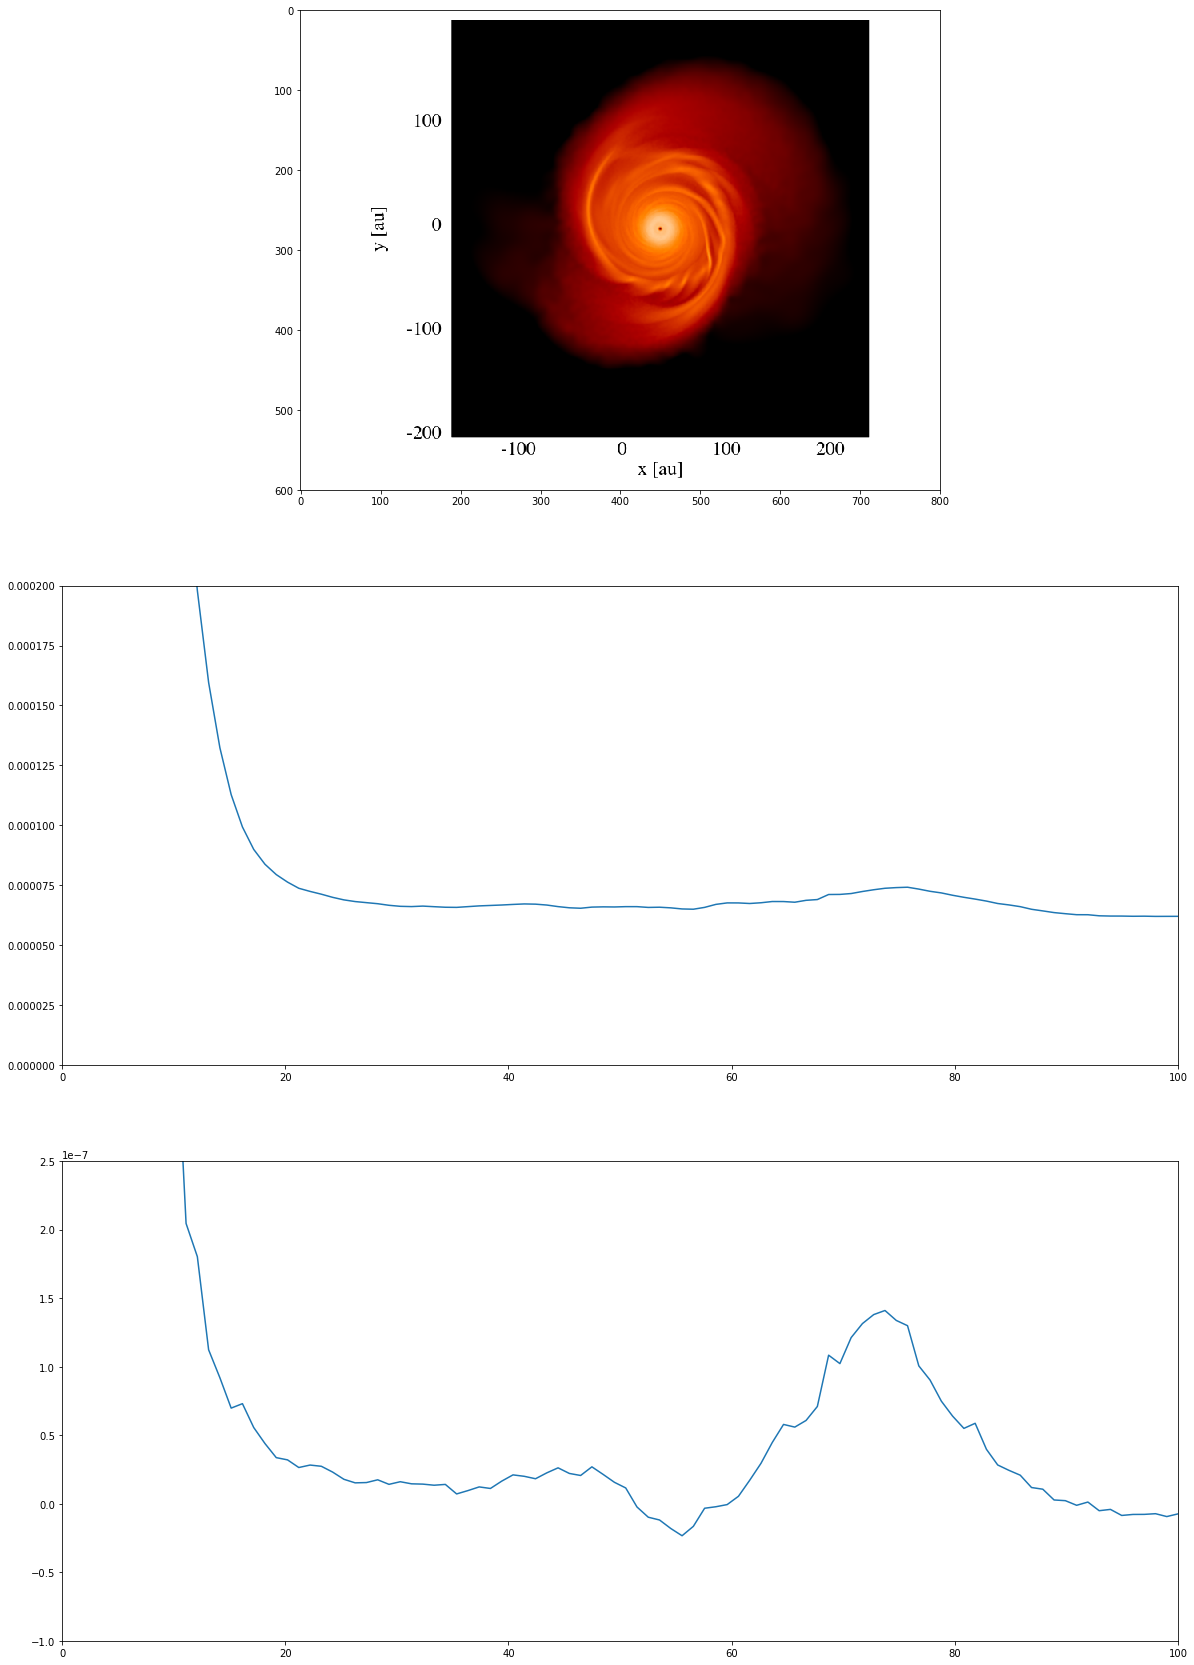

../a500/mdisc0.2/extra_dumps/sgdisc_00065


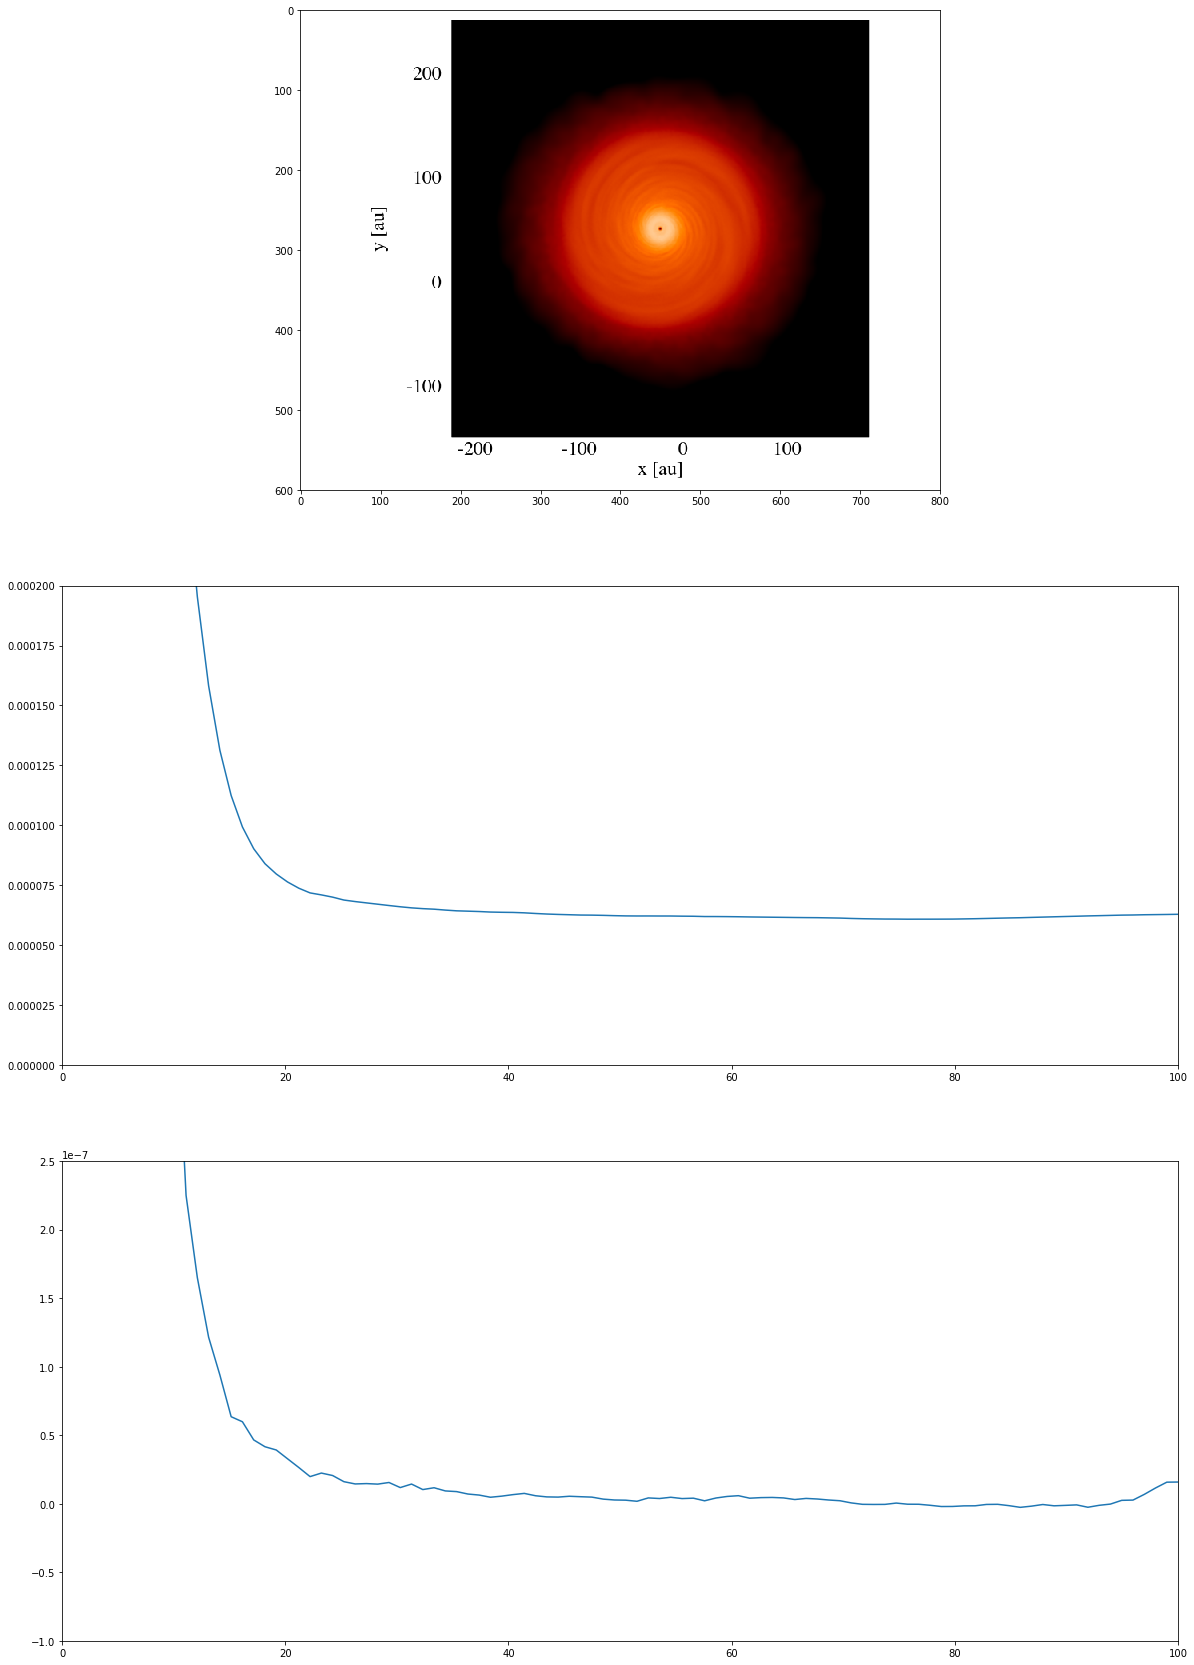

../single/mdisc0.2/extra_dumps/sgdisc_00020


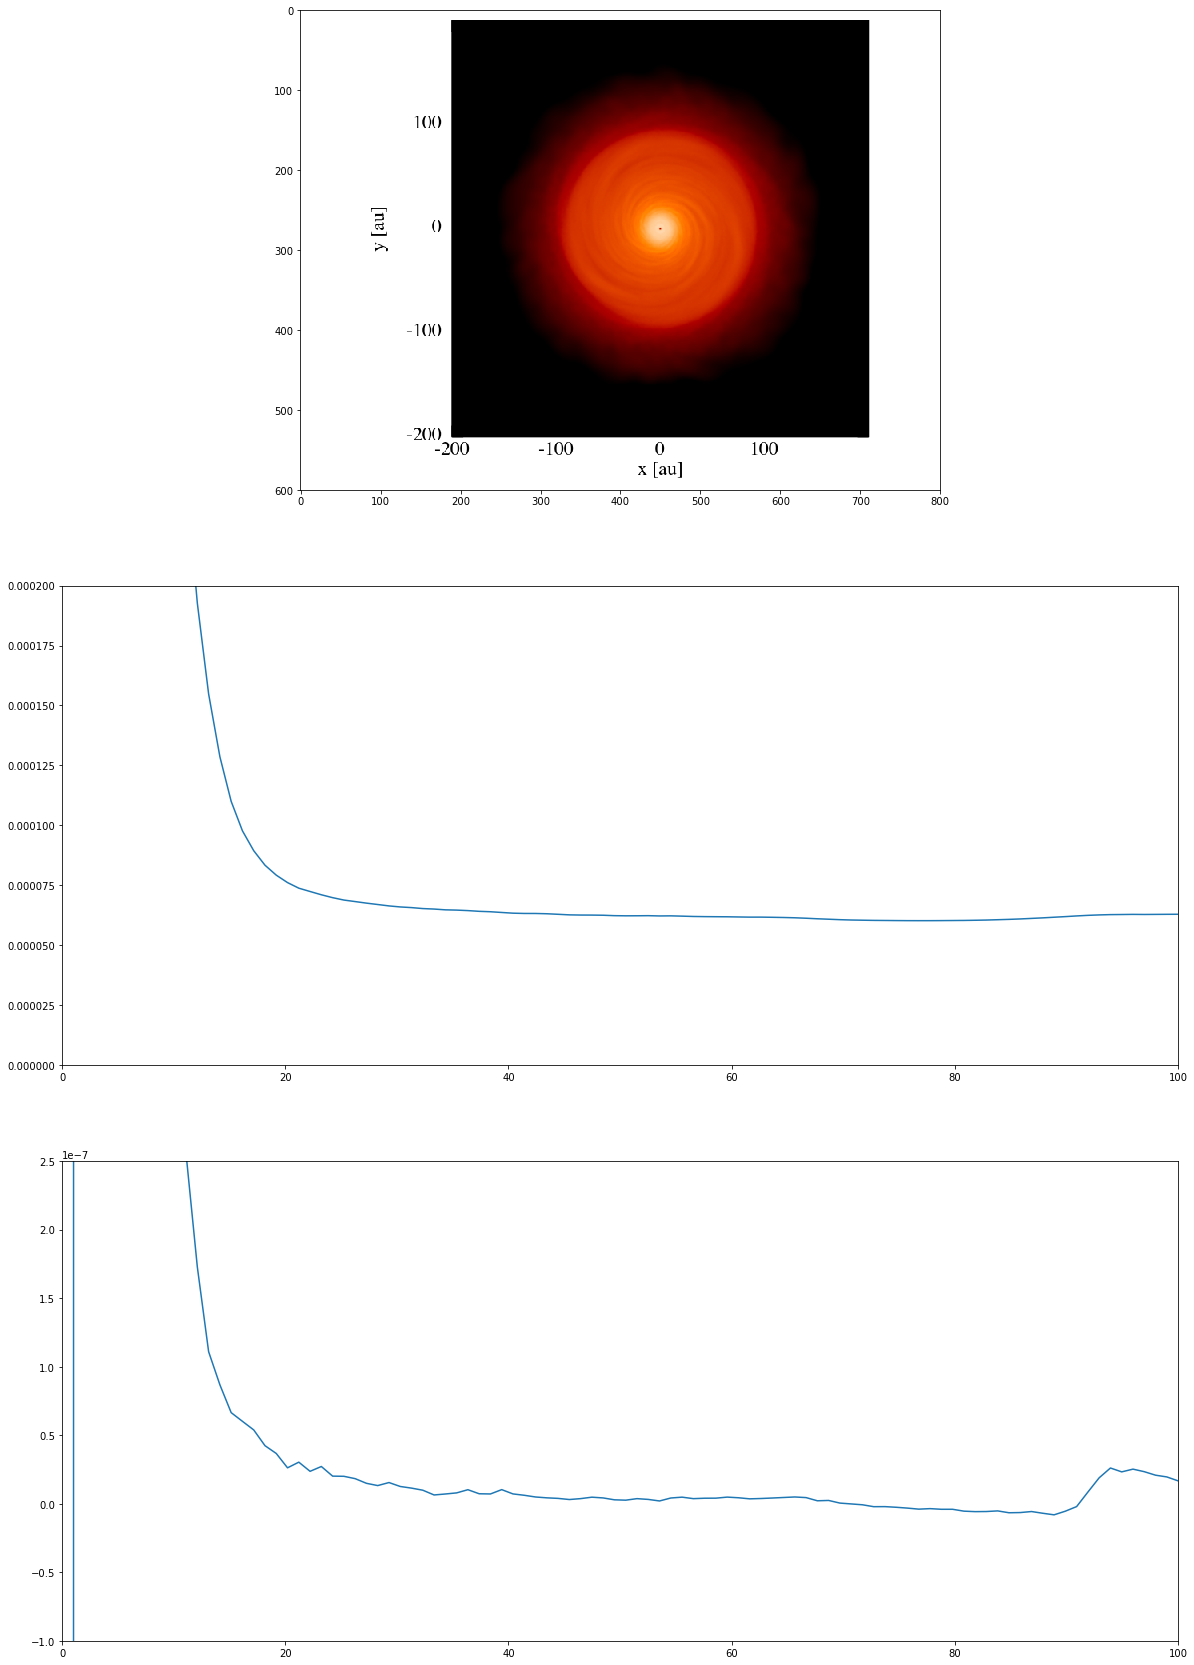

In [6]:
out_dir = '../u_and_udot_files'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

for dump in dumps:
    print(dump)
    fid = phantom.folder_id(dump)
    plot_id = 'u_and_udot_' + fid + '.dat'
    outfile = os.path.join(out_dir,plot_id)
    if not os.path.exists(outfile):
        phantom.generate_u_udot_file(dump,outfile)
    u_and_udot_raw_data = phantom.read_u_udot_file(outfile)
    u_and_udot = phantom.get_az_averaged_u_udot(u_and_udot_raw_data)

    fig, ax = plt.subplots(3,figsize=(20,30))
    
    im = Image.open(os.path.join('../extra_disc_plots',fid+'.png'))
    ax[0].imshow(im)
    
    ax[1].plot(u_and_udot['r'],u_and_udot['u'])
    ax[1].set_ylim([0,2e-4])
    ax[1].set_xlim([0,100])
    
    ax[2].plot(u_and_udot['r'],u_and_udot['udot'])
    ax[2].set_ylim([-1e-7,2.5e-7])
    ax[2].set_xlim([0,100])
    plt.show()